In [2]:
import os
import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

import seaborn as sns

plt.style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

import itertools

ModuleNotFoundError: No module named 'pandas_datareader'

##데이터 불러오기

In [1]:
data = pd.read_csv('./train.csv')

data = data.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
data.drop('num_date_time', axis = 1, inplace=True)
data

NameError: name 'pd' is not defined

#data preprocessing

In [11]:
#Raw data plot
# fig = data.plot()

df = data
# 'date_time' 컬럼을 datetime 형식으로 변환
df['date_time'] = pd.to_datetime(df['date_time'])

# 'date_time' 컬럼을 인덱스로 설정
df.set_index('date_time', inplace=True)

# 'power_consumption' 컬럼만 남기기
df = df[['power_consumption']]
fig = df.plot()

KeyError: 'date_time'

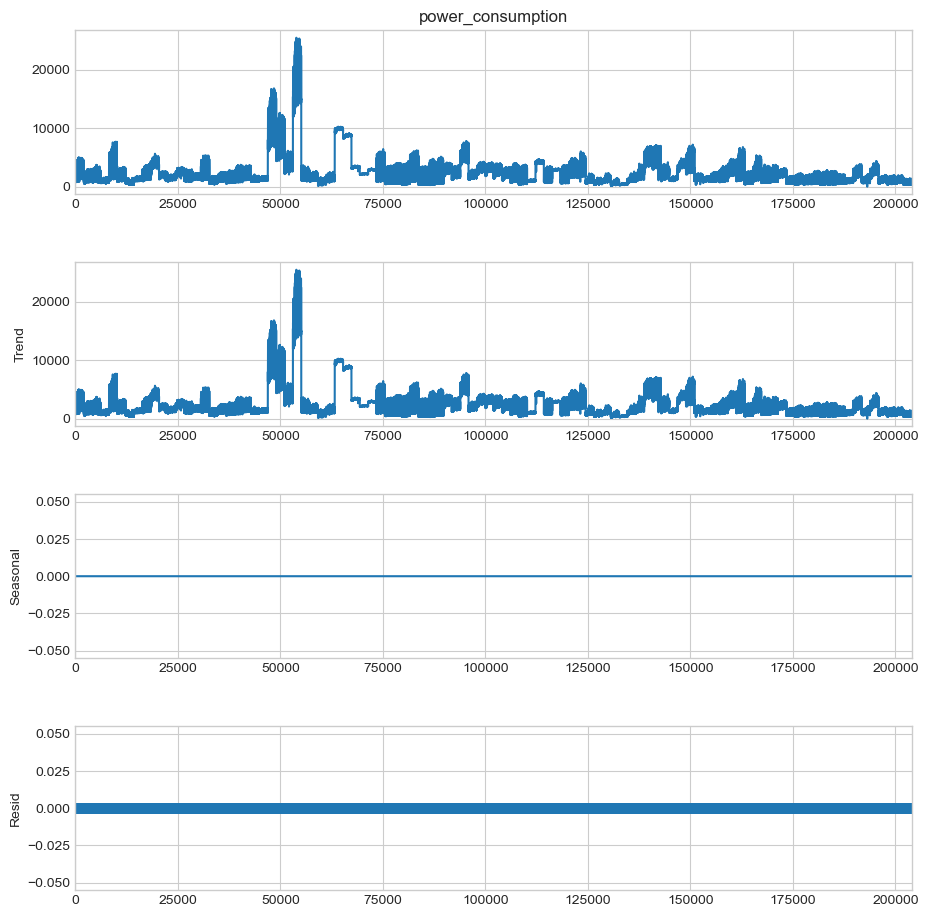

In [4]:
decompostion = sm.tsa.seasonal_decompose(data['power_consumption'], model='additive', period =1)
fig = decompostion.plot()
fig.set_size_inches(10,10)
plt.show()

In [5]:
data['date_time'] = data['date_time'].str.replace(' ', '')


ValueError: x is required to have ndim 1 but has ndim 2

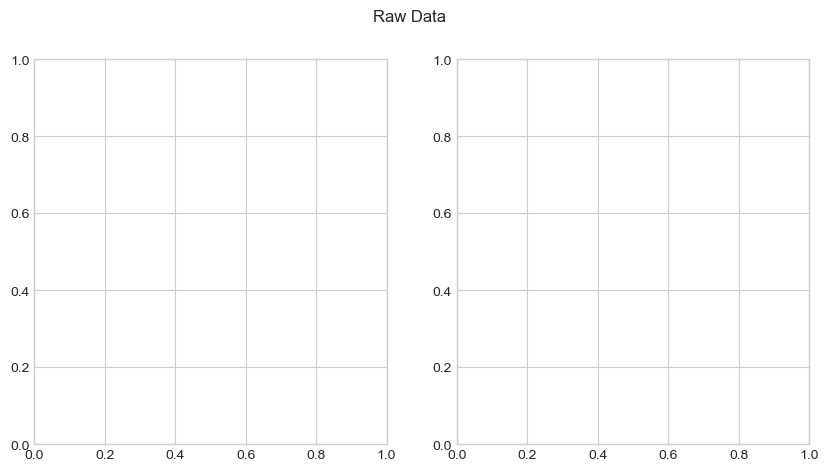

In [6]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(data, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax[1])